# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 12.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

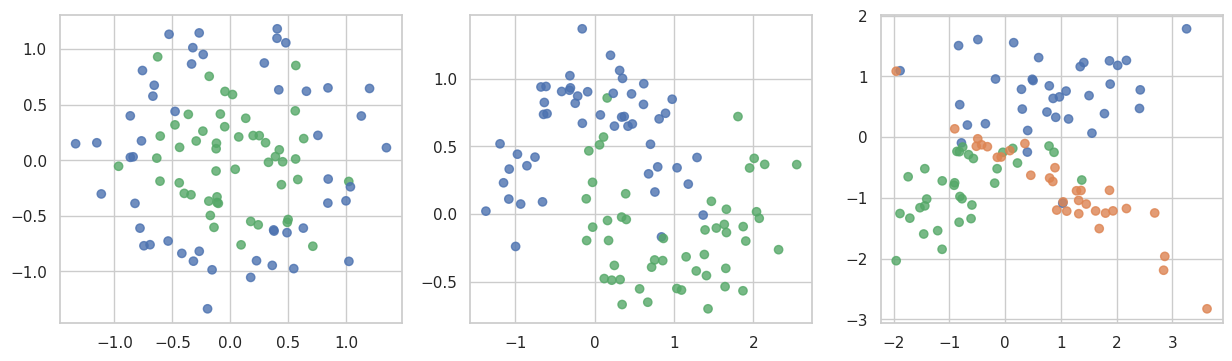

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

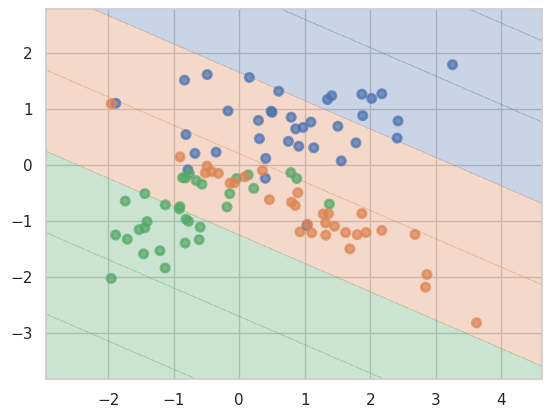

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

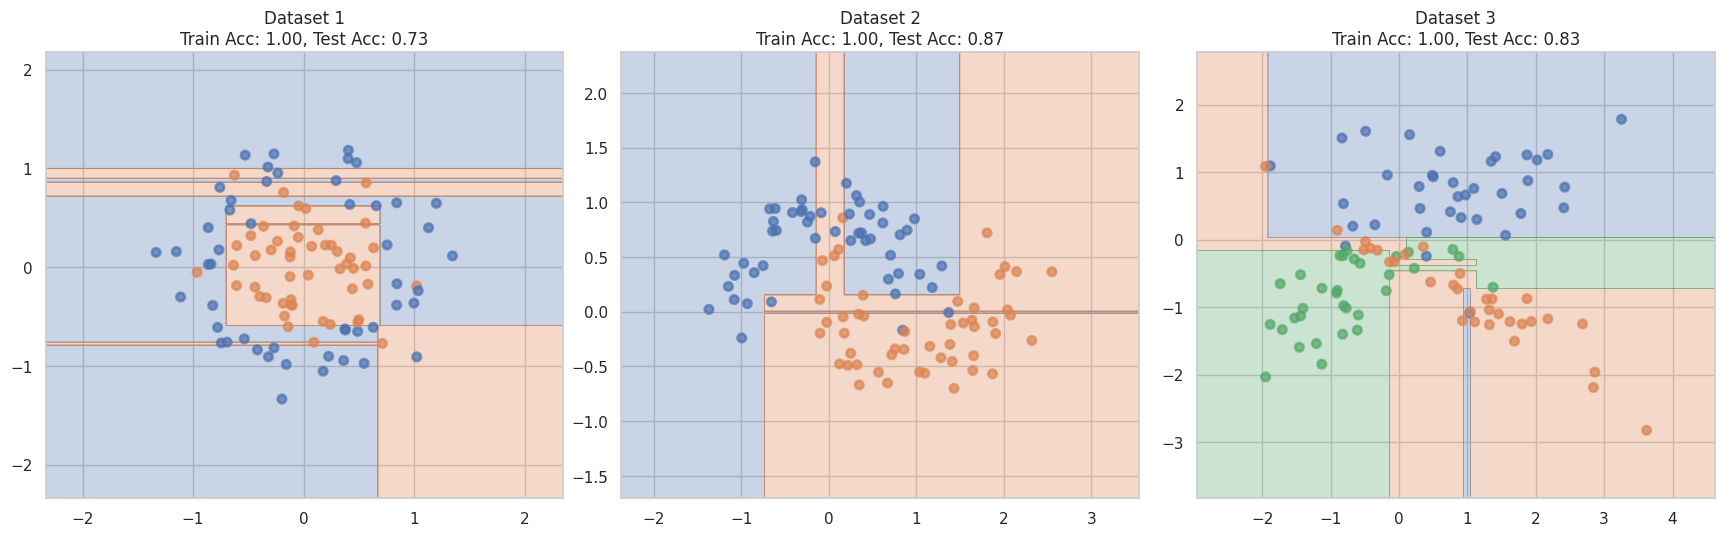

Dataset 1: Train Accuracy = 1.00, Test Accuracy = 0.73
Dataset 2: Train Accuracy = 1.00, Test Accuracy = 0.87
Dataset 3: Train Accuracy = 1.00, Test Accuracy = 0.83


In [ ]:
from sklearn.metrics import accuracy_score
plt.figure(figsize=(18, 6))
accuracy_results = []

for idx, (features, labels) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    accuracy_results.append((train_accuracy, test_accuracy))

    plt.subplot(1, 3, idx + 1)
    plot_surface(model, features, labels)
    plt.title(f"Dataset {idx + 1}\nTrain Acc: {train_accuracy:.2f}, Test Acc: {test_accuracy:.2f}")

plt.show()

for idx, (train_accuracy, test_accuracy) in enumerate(accuracy_results):
    print(f"Dataset {idx + 1}: Train Accuracy = {train_accuracy:.2f}, Test Accuracy = {test_accuracy:.2f}")


__Ответ:__ Модель идеально запомнила обучающие данные, но на тестовых данных точность стало ниже: В первом датасете разница большая, что указывает на сильное переобучение. Во втором датасете переобучение умеренное. В третьем датасете также наблюдается переобучение. Также об переобучении свидетельствуют тонкие линии, которые есть на графиках.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

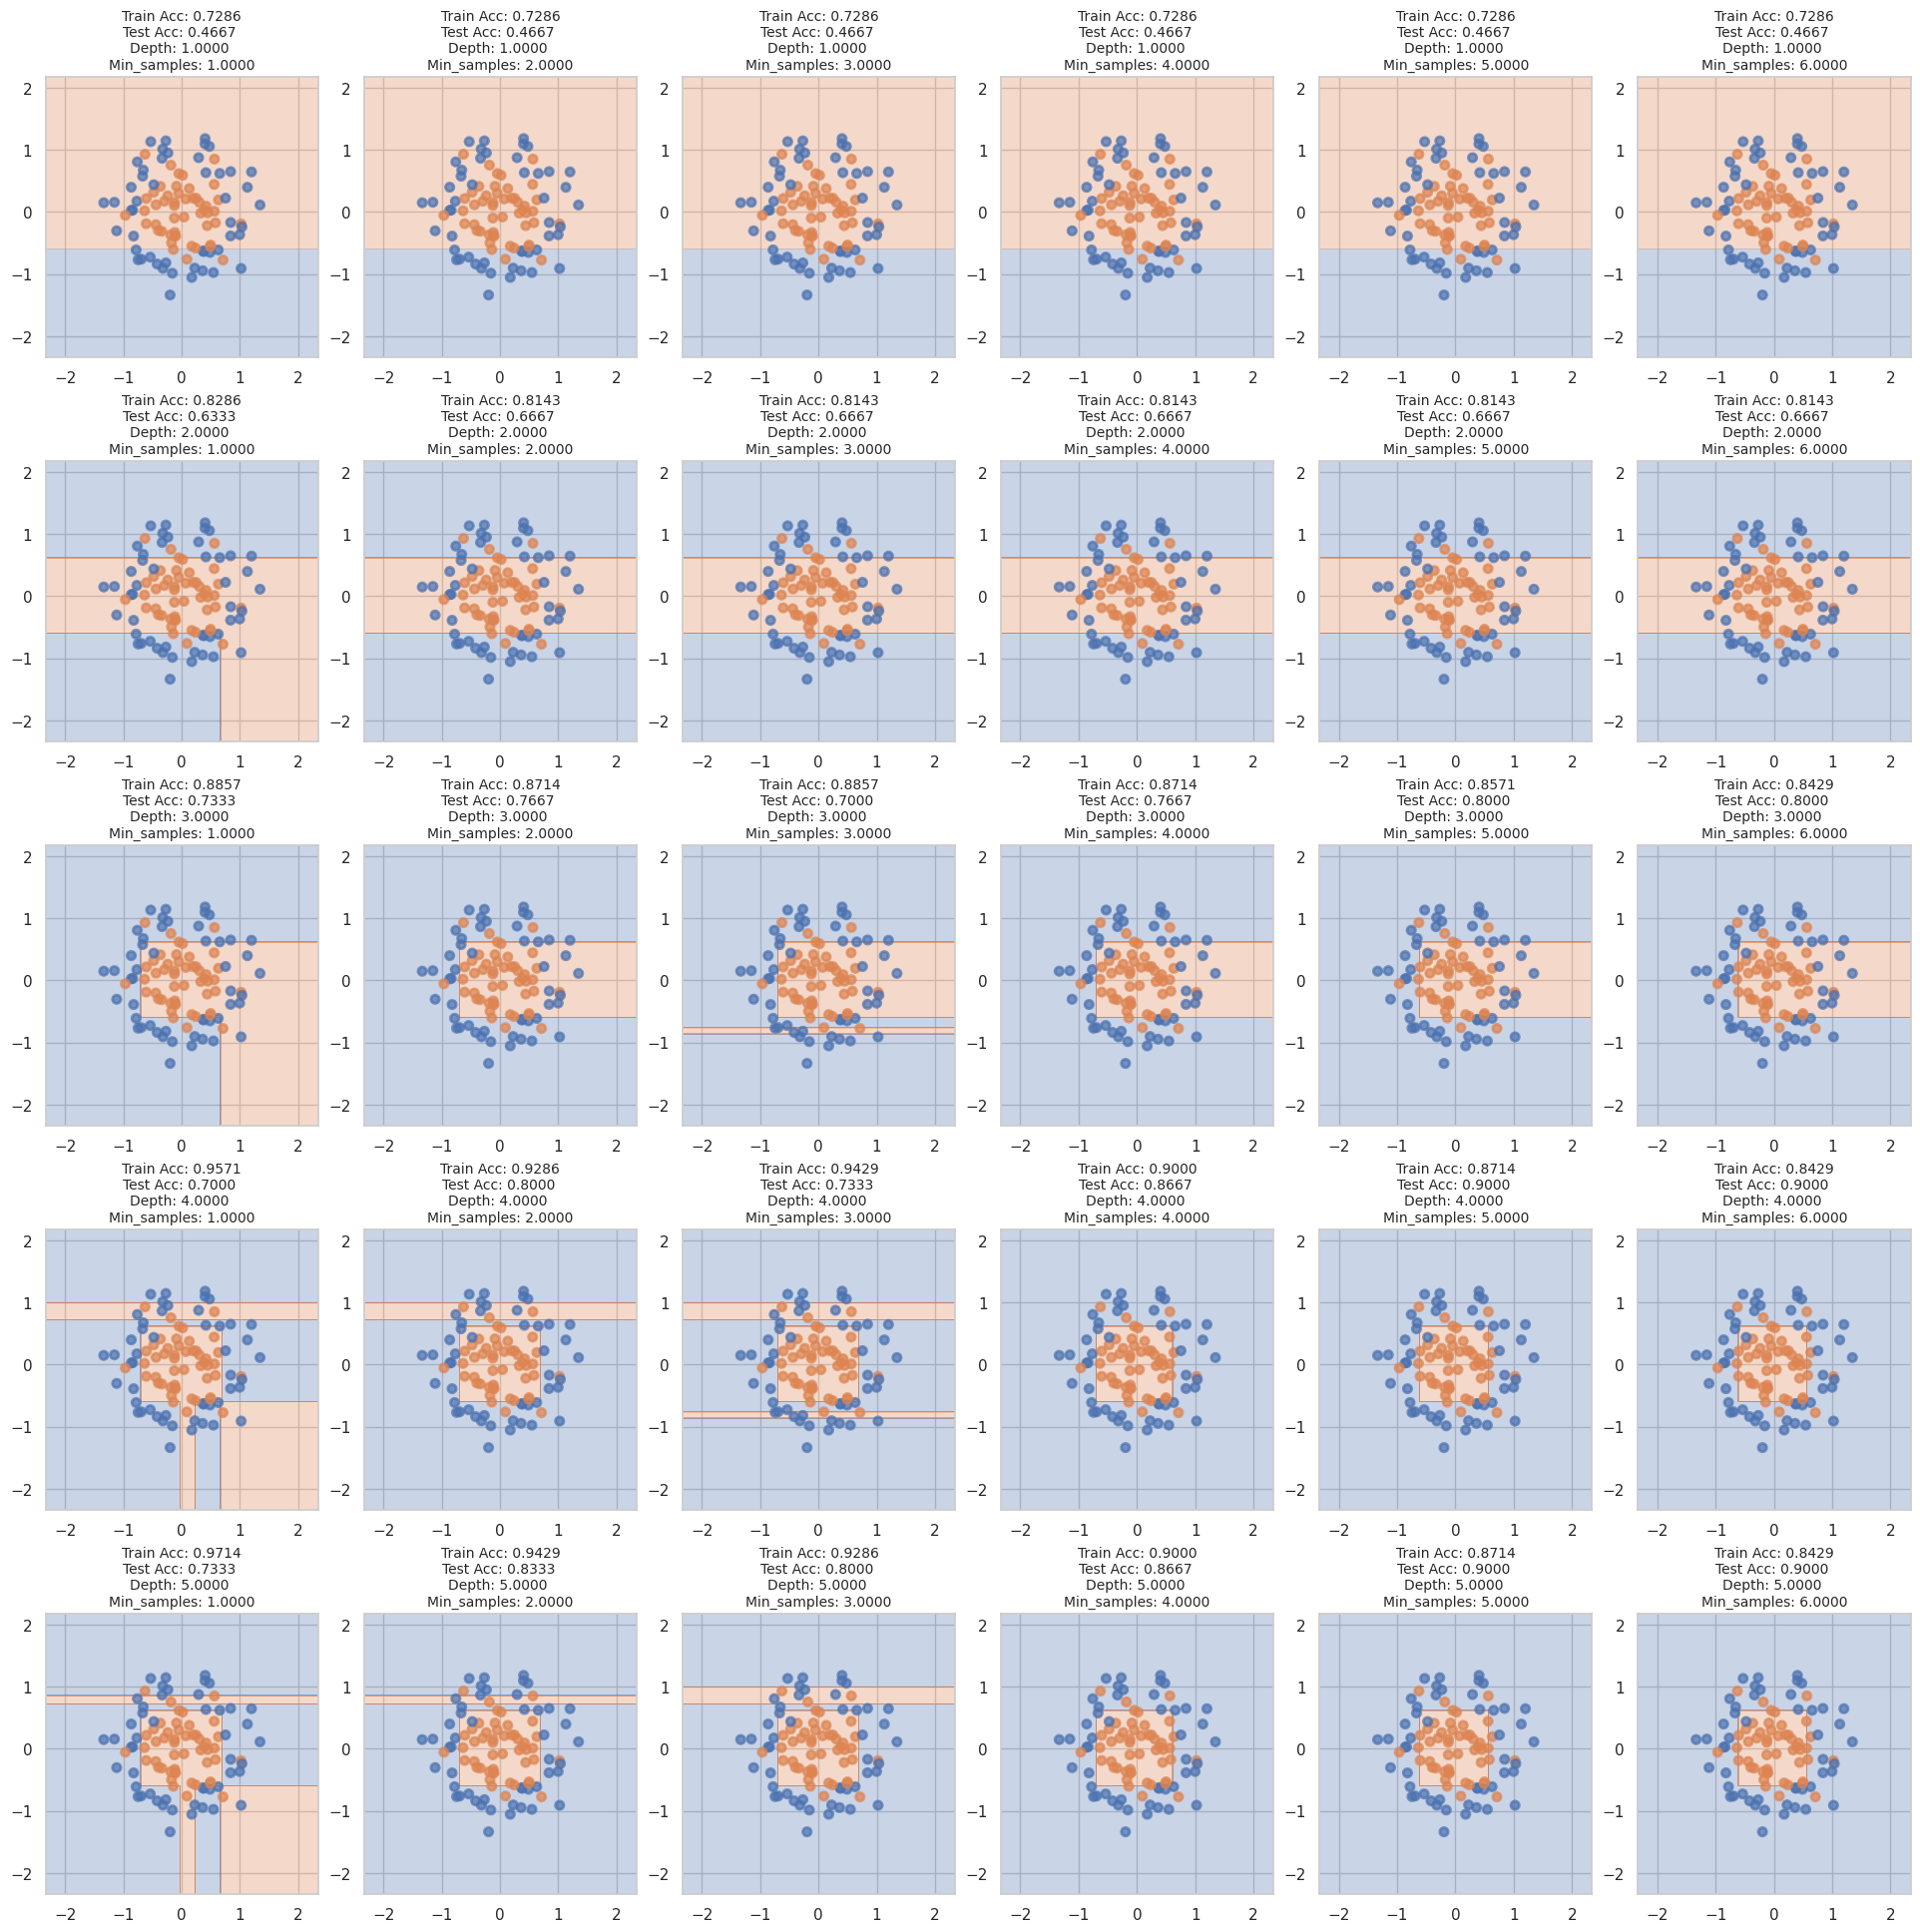

Лучшие параметры для Dataset 0: {'max_depth': 4, 'min_samples_leaf': 5, 'train_acc': 0.8714285714285714, 'test_acc': 0.9}


In [ ]:
def get_best_params(dataset_idx, datasets, axes):
    best_params = {}
    best_test_accuracy = 0
    features, labels = datasets[dataset_idx]
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

    for depth in range(1, 6):
        for min_samples in range(1, 7):
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples)
            model.fit(X_train, y_train)

            plt.sca(axes[depth - 1][min_samples - 1])
            plot_surface(model, features, labels)

            train_accuracy = accuracy_score(y_train, model.predict(X_train))
            test_accuracy = accuracy_score(y_test, model.predict(X_test))

            axes[depth - 1][min_samples - 1].set_title(
                f"Train Acc: {train_accuracy:.4f}\nTest Acc: {test_accuracy:.4f} \nDepth: {depth:.4f} \nMin_samples: {min_samples:.4f}",
                fontsize=10
            )
            if test_accuracy > best_test_accuracy:
                best_test_accuracy = test_accuracy
                best_params["max_depth"] = depth
                best_params["min_samples_leaf"] = min_samples
                best_params["train_acc"] = train_accuracy
                best_params["test_acc"] = test_accuracy

    return best_params

f, axes = plt.subplots(5, 6, figsize=(20, 20))
best_params_for_dataset_0 = get_best_params(0, datasets, axes)
plt.show()

print(f"Лучшие параметры для Dataset 0: {best_params_for_dataset_0}")


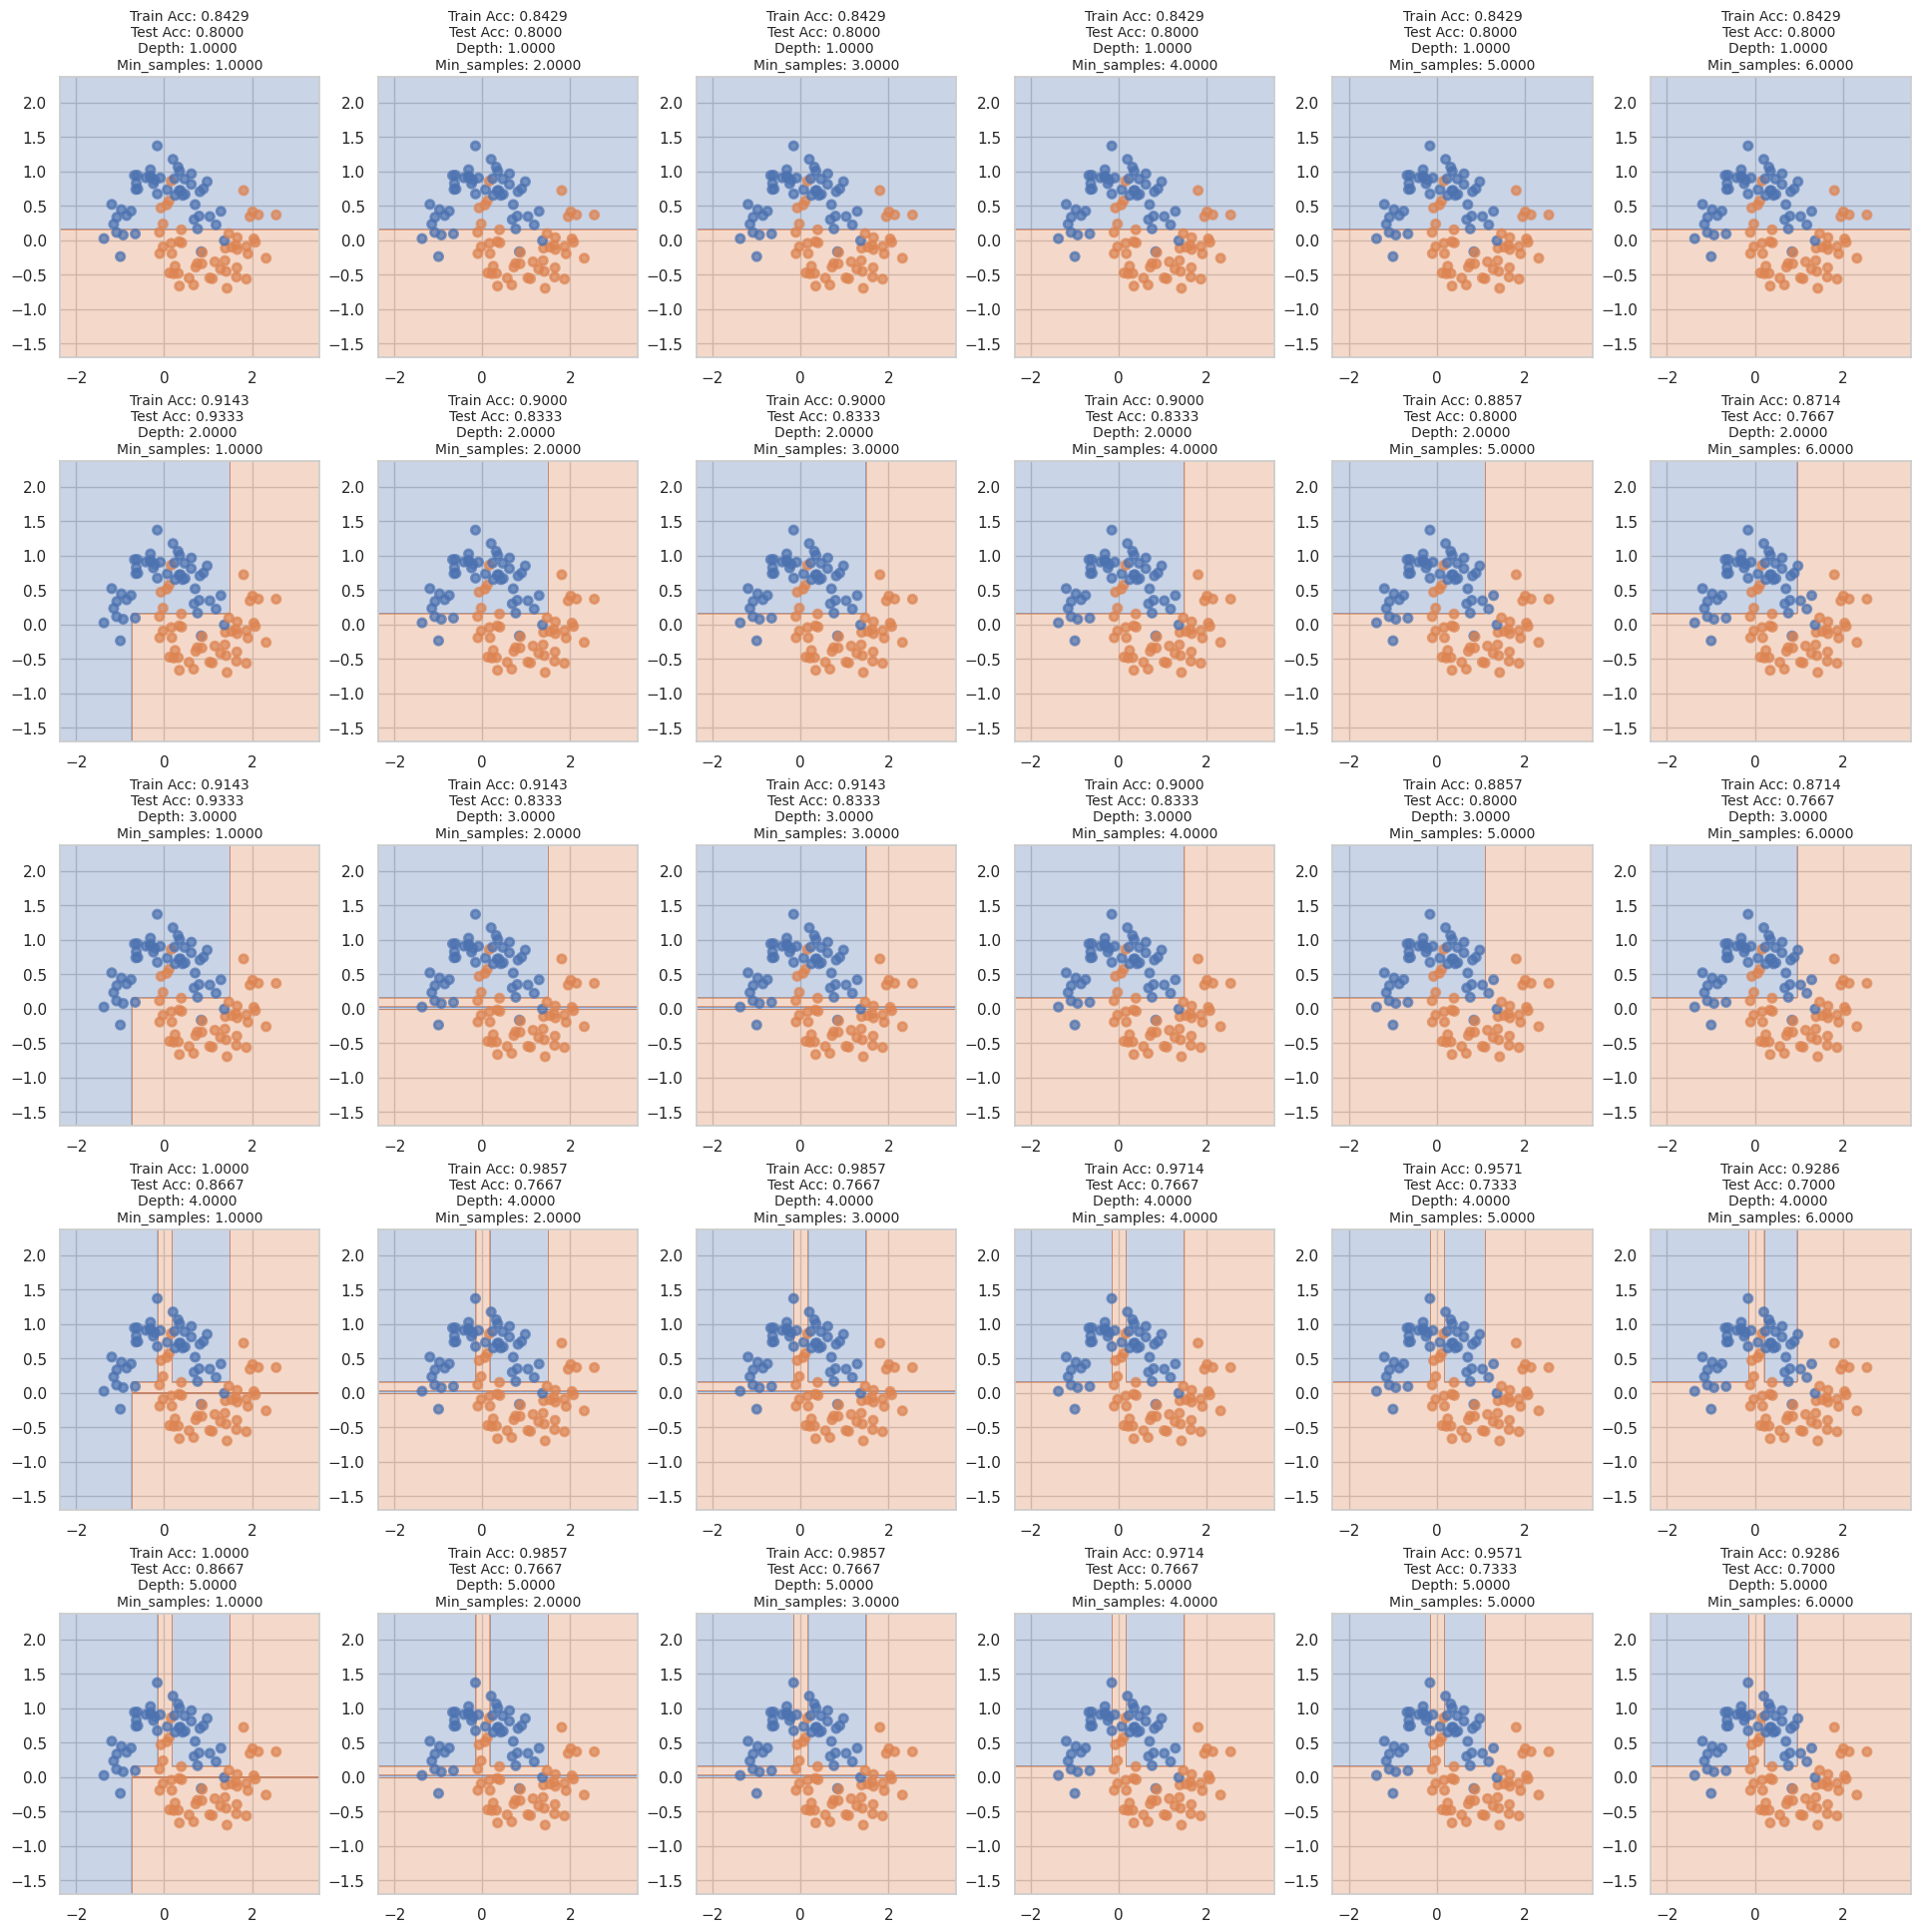

Лучшие параметры для Dataset 1: {'max_depth': 2, 'min_samples_leaf': 1, 'train_acc': 0.9142857142857143, 'test_acc': 0.9333333333333333}


In [ ]:
f, axes = plt.subplots(5, 6, figsize=(20, 20))
best_params_for_dataset_1 = get_best_params(1, datasets, axes)
plt.show()

print(f"Лучшие параметры для Dataset 1: {best_params_for_dataset_1}")

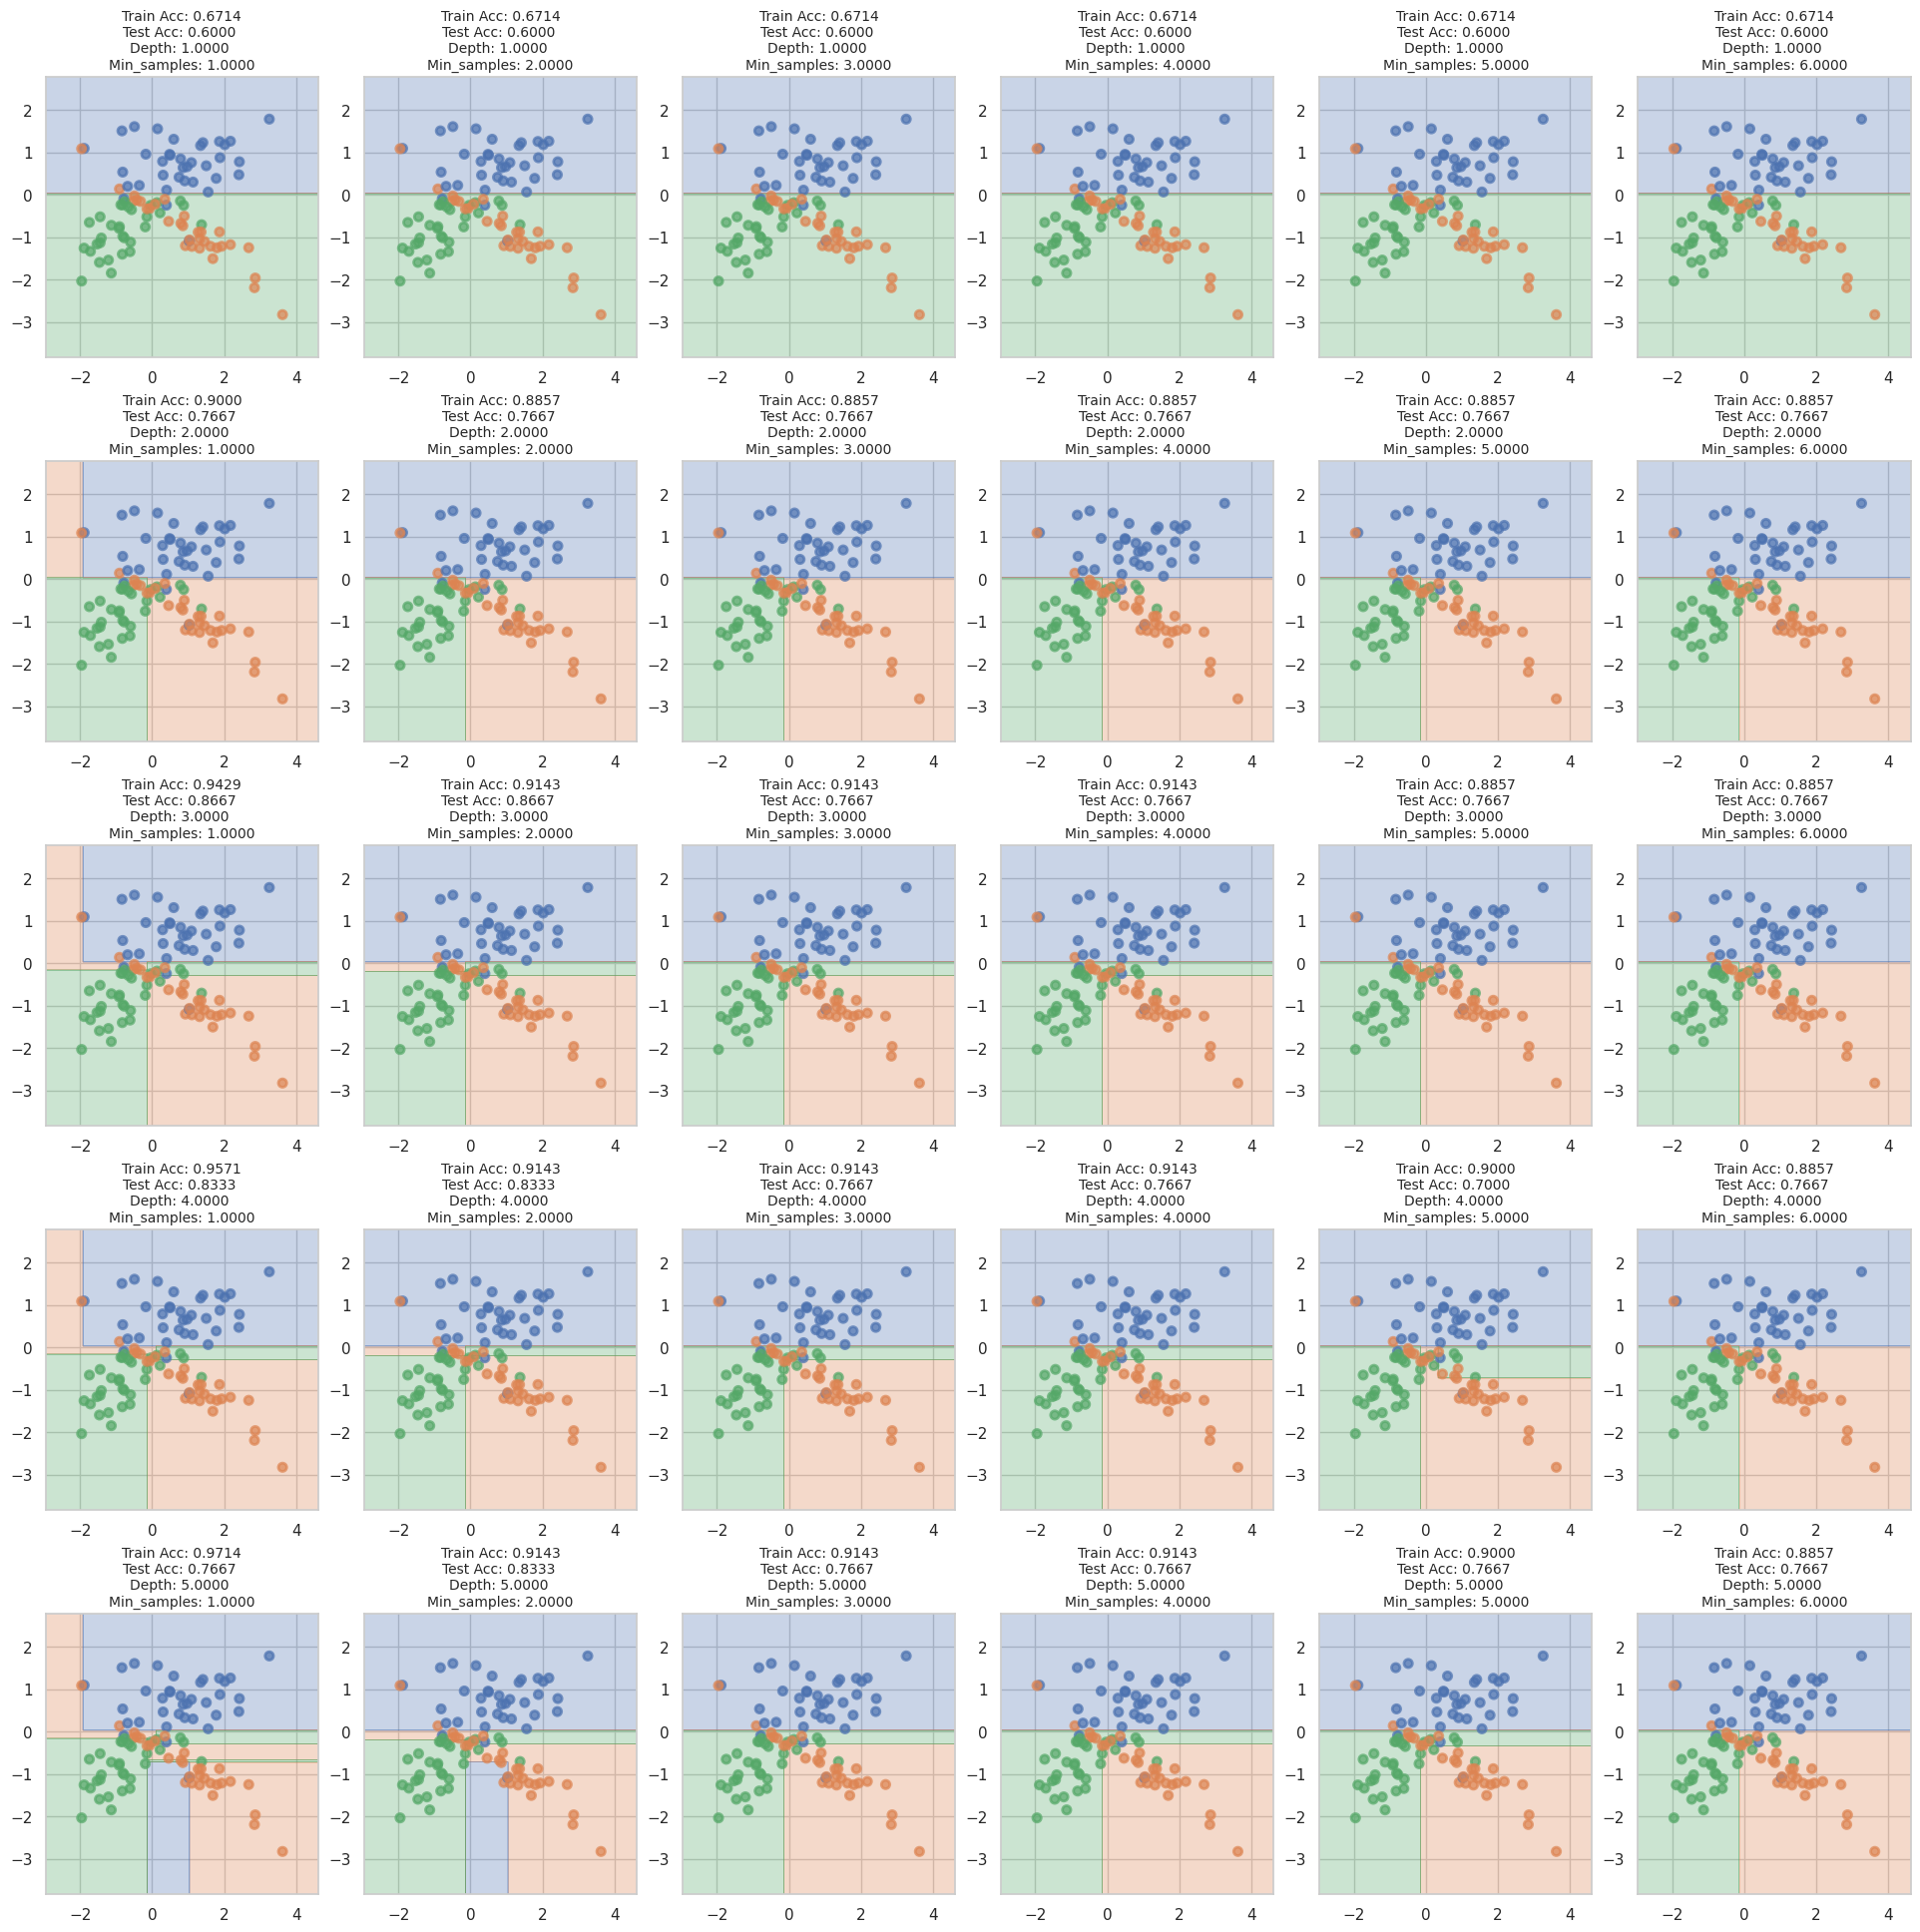

Лучшие параметры для Dataset 2: {'max_depth': 3, 'min_samples_leaf': 1, 'train_acc': 0.9428571428571428, 'test_acc': 0.8666666666666667}


In [ ]:
f, axes = plt.subplots(5, 6, figsize=(20, 20))
best_params_for_dataset_2 = get_best_params(2, datasets, axes)
plt.show()

print(f"Лучшие параметры для Dataset 2: {best_params_for_dataset_2}")

In [ ]:
import plotly.graph_objects as go

def plot_surface_plotly(clf, X, y):

    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)

    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    surface = go.Contour(x=xx[0], y=yy[:, 0], z=Z, colorscale='Viridis', opacity=0.3, showscale=False)
    scatter = go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                         marker=dict(color=y, colorscale='Viridis', line=dict(color='black', width=1)))

    return surface, scatter


__Ответ:__ Чем больше глубина, тем сложнее дерево и выше риск переобучения(увеличивается разрыв между Train Acc и Test Acc с ростом глубины).

Маленькие значения min_samples приводят к переобучению, большие — к лучшей обобщающей способности

Изменения в третьей модели менее заметные, дерево менее чувствительно к параметрам

Но при этом у деревьев с маленькой глубиной и большим значением min_samples - плохое качество


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/72492/run-report/129694587/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('/content/students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [ ]:
from hw5code import find_best_split

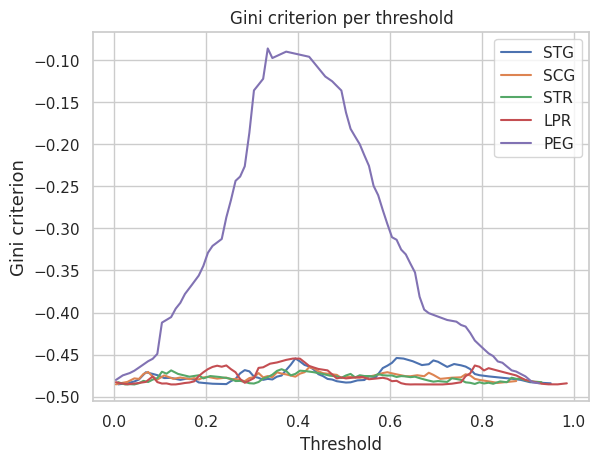

In [ ]:
for feature in ['STG', 'SCG', 'STR', 'LPR', 'PEG']:
    t, gini, _, _ = find_best_split(data[feature], data['UNS'].to_numpy())
    plt.plot(t, gini)
plt.legend(['STG', 'SCG', 'STR', 'LPR', 'PEG'])
plt.title('Gini criterion per threshold')
plt.xlabel('Threshold')
plt.ylabel('Gini criterion', fontsize=13)
plt.show()

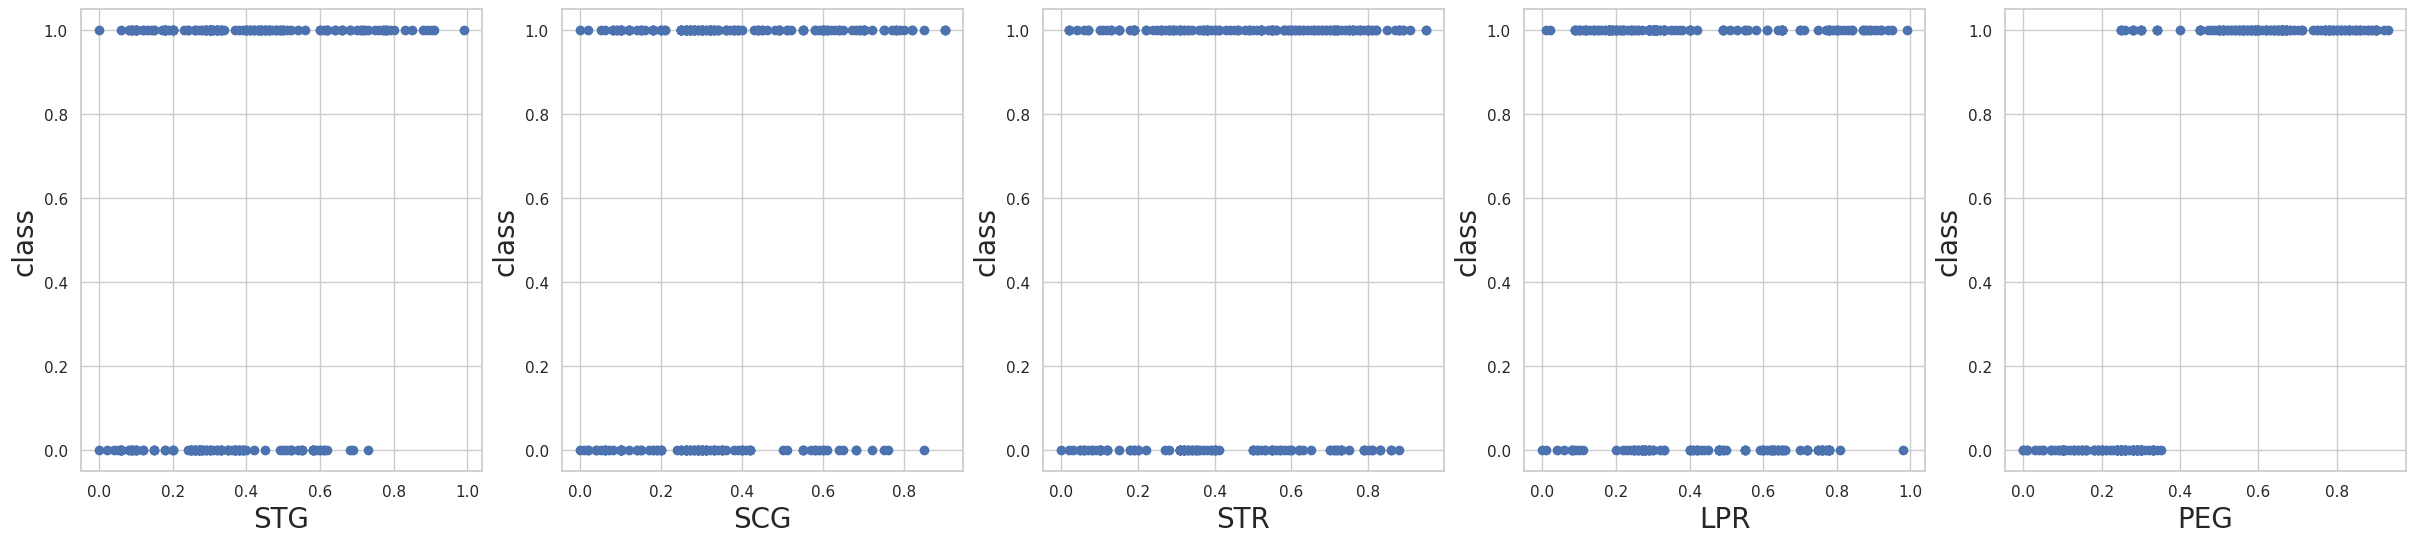

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(30, 6))
for i, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    ax[i].scatter(data[feature], data['UNS'])
    ax[i].set_xlabel(feature, fontsize=20)
    ax[i].set_ylabel('class', fontsize=20)
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Признак для деления выборки:
Признак PEG лучше всего подходит для деления выборки на два поддерева. Его кривая критерия Джини имеет вид, напоминающий нормальное распределение, и отличается от остальных признаков. Это позволяет эффективно разбить выборку на два класса с высокой информативностью.

Согласование с scatter-графиками:
Результаты действительно согласуются с визуальной оценкой scatter-графиков. На графике для признака PEG видно чёткое разделение на классы в диапазоне значений 0.3-0.4, где также наблюдается пик на кривой Джини.

Характеристика кривых для "хороших" признаков:
Кривые для хороших признаков, по которым выборка делится почти идеально, имеют форму, напоминающую нормальное распределение. Такая форма указывает на высокую информативность признака и возможность чёткого разделения выборки на два класса.

Кривые для "плохих" признаков:
Кривые для признаков, по которым деление невозможно или затруднительно, имеют плоский вид с небольшими колебаниями. Это указывает на то, что значения критерия Джини изменяются незначительно, и диапазон значений не даёт возможности чётко разделить выборку на классы.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

https://contest.yandex.ru/contest/72492/run-report/129716449/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/agaricus-lepiota.data')
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [ ]:
data = data.apply(LabelEncoder().fit_transform)
X, y = data.drop(columns='p'), data['p']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=42)

data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [ ]:
from hw5code import DecisionTree

tree =DecisionTree(['categorical'] * X.shape[1])
tree.fit(X_train, y_train)
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

In [ ]:
print(f'train accuracy: {accuracy_score(y_train, train_pred)}, test accuracy: {accuracy_score(y_test, test_pred)}')

train accuracy: 1.0, test accuracy: 1.0


In [ ]:
len(tree._tree)

5

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data_tic = pd.read_csv('tic-tac-toe-endgame.csv')
data_tic.loc[data_tic['V10'] == 'positive', 'V10'] = 1
data_tic.loc[data_tic['V10'] == 'negative', 'V10'] = 0
train, test = train_test_split(data_tic, test_size=0.2, random_state=42)
X_train_tic = train.drop(columns = 'V10')
y_train_tic = train['V10']
X_test_tic = test.drop(columns = 'V10')
y_test_tic = test['V10']
categorical = ['categorical'] * X_train_tic.shape[1]

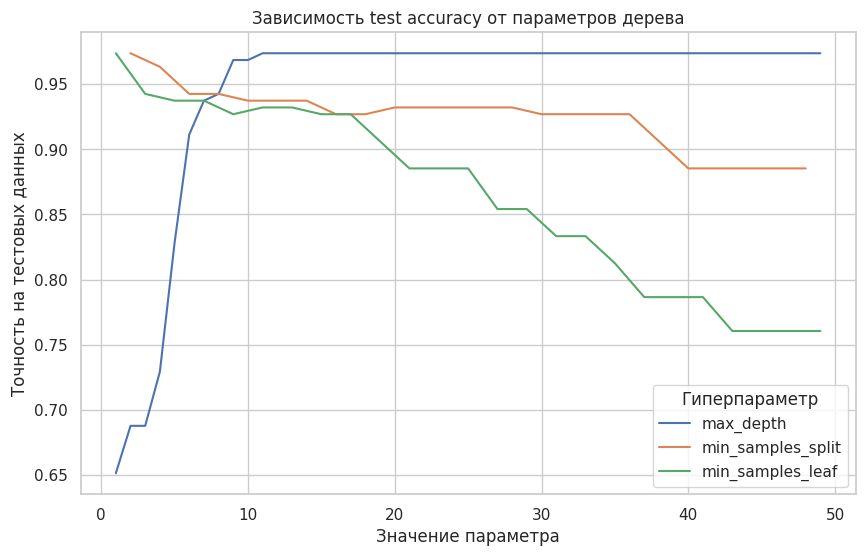

In [ ]:
max_depths = np.arange(1, 50)
min_samples_splits = np.arange(2, 50, 2)
min_samples_leaves = np.arange(1, 50, 2)

depth_accuracy = []
split_accuracy = []
leaf_accuracy = []

for depth in max_depths:
    clf = DecisionTree(categorical, max_depth=depth)
    clf.fit(np.array(X_train_tic), np.array(y_train_tic))
    y_pred_test = clf.predict(np.array(X_test_tic))
    depth_accuracy.append(accuracy_score(np.array(y_test_tic.astype(int)), y_pred_test))

for min_split in min_samples_splits:
    clf = DecisionTree(categorical, min_samples_split=min_split)
    clf.fit(np.array(X_train_tic), np.array(y_train_tic))
    y_pred_test = clf.predict(np.array(X_test_tic))
    split_accuracy.append(accuracy_score(np.array(y_test_tic.astype(int)), y_pred_test))

for min_leaf in min_samples_leaves:
    clf = DecisionTree(categorical, min_samples_leaf=min_leaf)
    clf.fit(np.array(X_train_tic), np.array(y_train_tic))
    y_pred_test = clf.predict(np.array(X_test_tic))
    leaf_accuracy.append(accuracy_score(np.array(y_test_tic.astype(int)), y_pred_test))

plt.figure(figsize=(10, 6))

sns.lineplot(x=max_depths, y=depth_accuracy, label='max_depth')
sns.lineplot(x=min_samples_splits, y=split_accuracy, label='min_samples_split')
sns.lineplot(x=min_samples_leaves, y=leaf_accuracy, label='min_samples_leaf')

plt.title('Зависимость test accuracy от параметров дерева')
plt.xlabel('Значение параметра')
plt.ylabel('Точность на тестовых данных')
plt.legend(title='Гиперпараметр')
plt.grid(True)
plt.show()


__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения:
     $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} +
     \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from hw5linreg import LinearRegressionTree

In [ ]:
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_dtr.fit(X_train, y_train)

best_dtr = grid_search_dtr.best_estimator_
y_pred_dtr = best_dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print("Лучшие гиперпараметры для DecisionTreeRegressor:", grid_search_dtr.best_params_)
print("MSE для DecisionTreeRegressor:", mse_dtr)


Fitting 5 folds for each of 171 candidates, totalling 855 fits
Лучшие гиперпараметры для DecisionTreeRegressor: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}
MSE для DecisionTreeRegressor: 0.4048105753244967


In [ ]:
best_mse_lrt = float('inf')
best_params_lrt = {}
feature_types = ["real"] * X.shape[1]
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            lrt = LinearRegressionTree(feature_types, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            lrt.fit(X_train, y_train)
            y_pred_lrt = lrt.predict(X_test)
            mse_lrt = mean_squared_error(y_test, y_pred_lrt)
            if mse_lrt < best_mse_lrt:
                best_mse_lrt = mse_lrt
                best_params_lrt = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

print("Лучшие гиперпараметры для LinearRegressionTree:", best_params_lrt)
print("MSE для LinearRegressionTree:", best_mse_lrt)

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [ ]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE

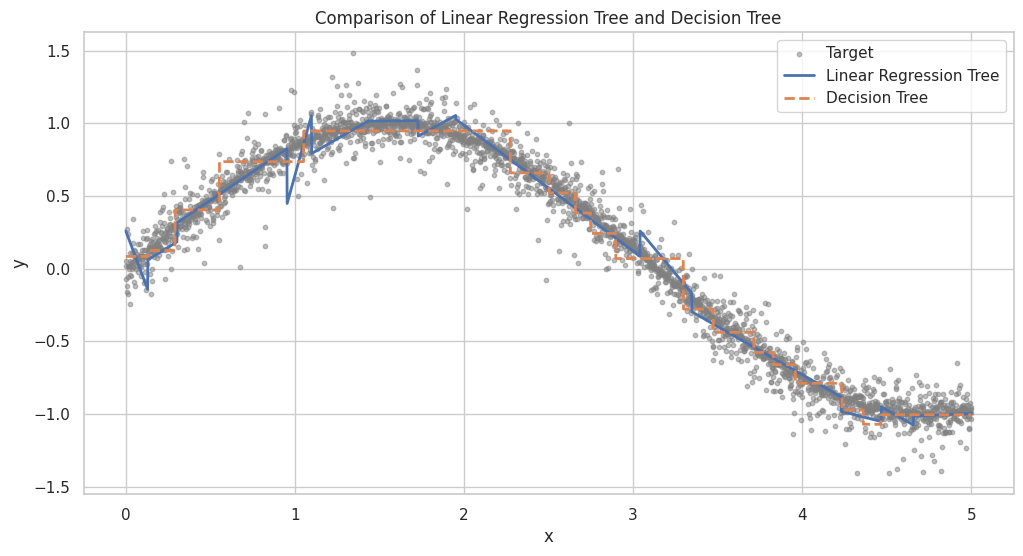

In [ ]:
from hw5linreg import LinearRegressionTree
from sklearn.tree import DecisionTreeRegressor
feature_types = ["real"]
lin_tree = LinearRegressionTree(feature_types, max_depth=5, min_samples_split=10, min_samples_leaf=5)
lin_tree.fit(x_train, y_train)
y_pred_lin_tree = lin_tree.predict(x)

reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
reg_tree.fit(x_train, y_train)
y_pred_reg_tree = reg_tree.predict(x)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='gray', s=10, label='Target', alpha=0.5)
plt.plot(x, y_pred_lin_tree, label='Linear Regression Tree', linewidth=2)
plt.plot(x, y_pred_reg_tree, label='Decision Tree', linewidth=2, linestyle='--')
plt.title('Comparison of Linear Regression Tree and Decision Tree')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mse_lrt = mean_squared_error(y, y_pred_lin_tree)
mse_dtr = mean_squared_error(y, y_pred_reg_tree)
mse_lrt, mse_dtr

(0.013583175666838756, 0.01476800669560597)

**Ответ:**
LinearRegressionTree (наша модель) делает более плавные и гладкие предсказания, особенно когда данные имеют линейные зависимости. Однако обучение такой модели занимает больше времени(особенно поиск гиперпараметров в прошлом пункте), и она плохо справляется с резкими изменениями в данных. В отличие от неё, DecisionTreeRegressor (из библиотеки) обучается быстрее и лучше работает на данных с резкими скачками, но его предсказания могут быть менее гладкими и часто переобучаются на шумных данных. По результатам MSE, LinearRegressionTree показала немного меньшую ошибку по сравнению с DecisionTreeRegressor.

Вставьте что угодно, описывающее ваши впечатления от этого задания: